<a href="https://colab.research.google.com/github/ElxCoNe/Machine-learning---RandomForest/blob/main/ML_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #Sirve para analizar y manipular datos del dataset
import numpy as np #Crear y manipular matrices, además para formulas matematicas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt #Sirve para crear visualizaciones estaticas, animadas e interactivas
import seaborn as sns #Es una biblioteca para visualizar datos desde interfaz de alto nivel
from sklearn.preprocessing import MinMaxScaler #Se utiliza para ajustar los datos entre rangos fijos (0 y 1)


#Se utiliza la librería de sklearn.datasets para acceder al conjunto de datos buscado.

from sklearn.datasets import load_breast_cancer
var = load_breast_cancer()

In [ ]:
#Se usa el np.c para concatenar valores y np.append se usa para agregar datos entre matrices
#La columna target es donde están los valores de clasificación
#Se utiliza los dataframe para crear matrices entre los datos y sus relaciones

df_var = pd.DataFrame(np.c_[var['data'], var['target']], columns = np.append(var['feature_names'],['target']))
df_var.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df_var.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
#contiene dos valores: el número de filas y columnas en el DataFrame.
df_var.shape

(569, 31)

In [ ]:
# Para obtener los estadísticos descriptivos básicos del dataset y los cuartiles.
df_var.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
print (df_var.target.value_counts()[1.0], "Beningnos y malignos son",
       df_var.target.value_counts()[0.0])

357 Beningnos y malignos son 212


In [ ]:
#Se utiliza la función .value_counts para contar los valores de una columna en espefico
#0 = M y 1 = B
df_var['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

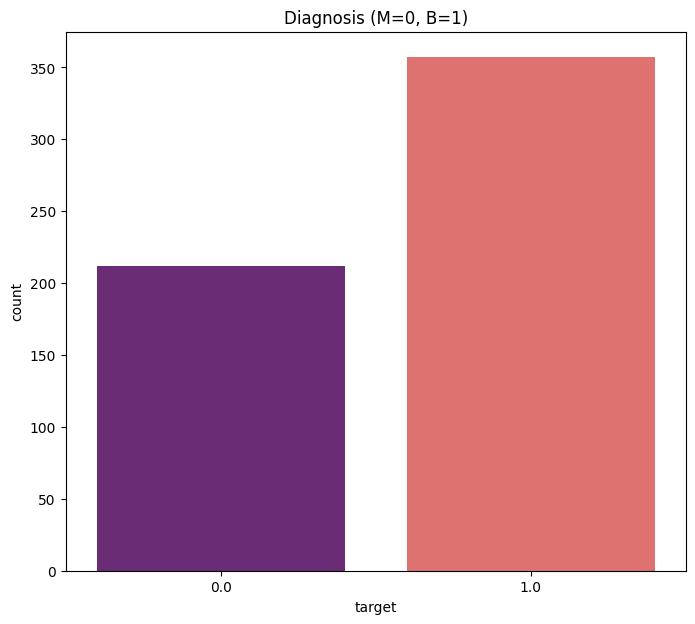

In [ ]:
plt.figure(figsize = (8,7))
sns.countplot(data=df_var, x="target", palette='magma')
plt.title("Diagnosis (M=0, B=1)")
plt.show

In [ ]:
#Asignamos los valores que entrenaremos en X, así que con la función drop, indicamos que retire target y con axis = 1 le decimos que especificamente retire la columna de target
#En axis, 0 son filas y 1 son columnas
X = df_var.drop(['target'], axis = 1)
Y = df_var['target']

In [ ]:
#Asignamos varaibles a las pruebas y entrenamientos e indicamos el tamaño de datos asignado a la prueba
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.25)

In [ ]:
#Se le asigna a una variable la función de RandomForest
arbol = RandomForestClassifier(n_estimators=100, criterion='entropy')
arbol.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#Se le asigna a las variables los datos para realizar las predicciones
y_hat_test = arbol.predict(x_test)
y_hat_train = arbol.predict(x_train)
#Se utiliza el accuracy para ver la prisición de los datos
print(accuracy_score(y_test,y_hat_test))

0.951048951048951


In [ ]:
#Con el classification_report podremos calcular las demás métricas como la precisión, el recall F1-score y support
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        49
         1.0       0.96      0.97      0.96        94

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



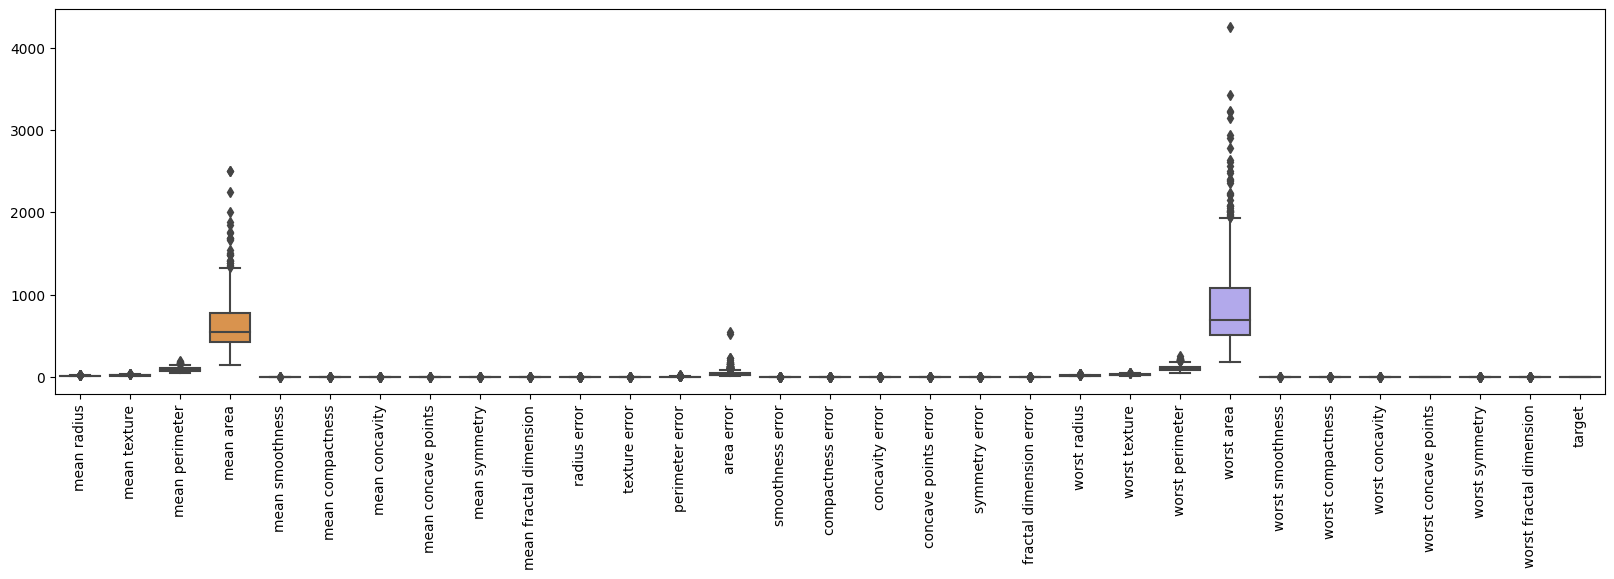

In [ ]:
plt.figure(figsize=(20, 5)) #Se utiliza para hacer visualizaciones de datos
sns.boxplot(data=df_var)
plt.xticks(rotation=90);

In [ ]:
scaler = MinMaxScaler() #Se asigna a una variable la función para normalizar
#Fit_transform es un metodo para calcular los parametros requeridos, para que después se le asigné los parametros calculados a los datos estandarizados
df_norm = pd.DataFrame(scaler.fit_transform(df_var), columns=df_var.columns)
df_norm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


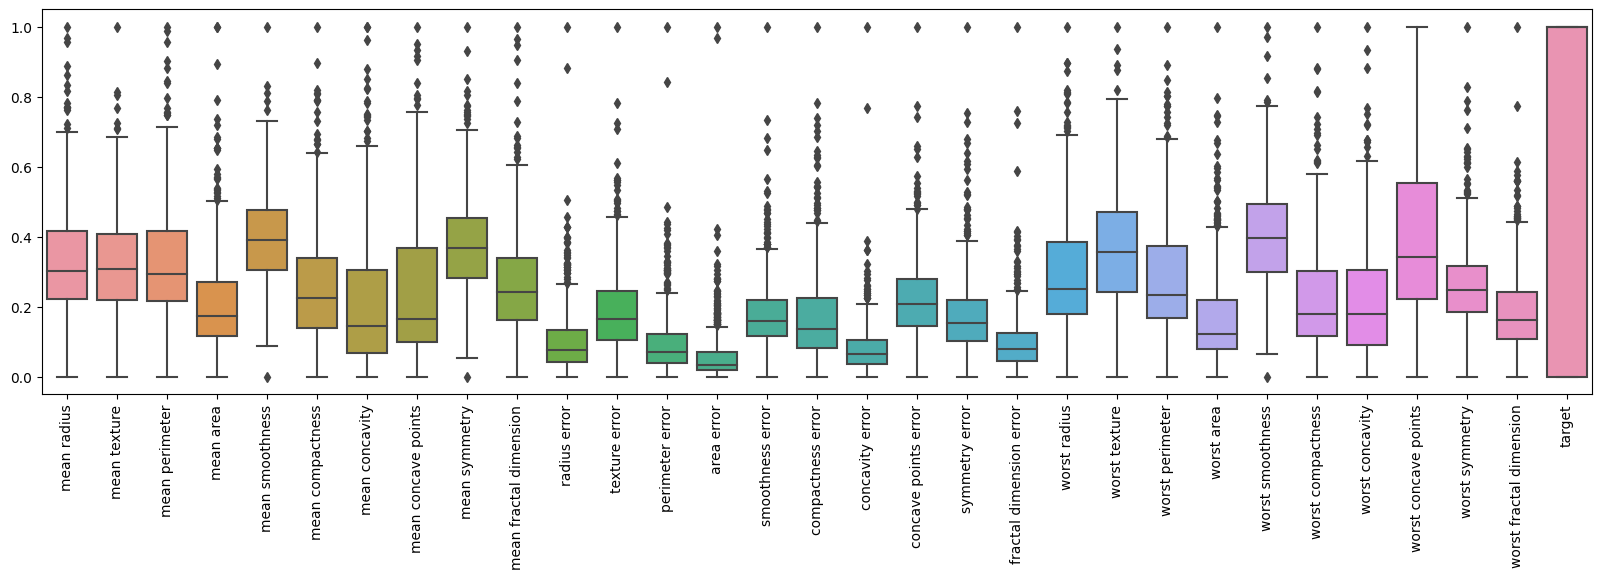

In [ ]:
plt.figure(figsize=(20, 5)) #Se utiliza para hacer visualizaciones de datos
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

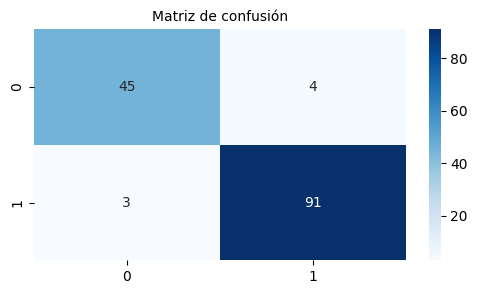

In [ ]:
#Para visualizar la matriz de confusión
plt.figure(figsize=(6,3))
plt.title("Matriz de confusión", fontsize=10)
sns.heatmap(confusion_matrix(y_test, y_hat_test), annot=True, cmap='Blues', fmt='.0f')
plt.show()

In [ ]:
print(accuracy_score(y_test,y_hat_test))

0.951048951048951


In [ ]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        49
         1.0       0.96      0.97      0.96        94

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

